# Machine Learning

#### Langkah - langkah dalam membuat Machine Learning:
1. Eksplorasi Data & Data Pre-processing
2. Pemodelan dengan Scikit-Learn
    - Pemilihan algoritma yang sesuai untuk Type Supervised Learning: (algoritma umum)
        - LogisticRegression()
        - DecisionTreeClassifier()
        - LinearRegression()
    - Regression Performance Evaluation

    - Pemilihan algoritma yang sesuai untuk Type Unsupervised Learning: (algoritma umum)
        - K-Means Clustering
    - Grafik evaluation

## Pengenalan Machine Learning

##### 1. Terminologi Machine Learning:
- Dataset : Sekumpulan data yang digunakan dalam ML
- Training Dataset : Data untuk membuat/melatih model ML
- Test Dataset : Data untuk menguji performa/akurasi dari model yang telah dilatih/di-training
- Algorithm : Teknik/Pendekatan untuk membangun model
- Model : Output dari proses melatih algorithm dengan suatu dataset

##### 2. Terminologi Dataset:
- Feature/Variabel : Bagian KOLOM dataset
- Data point/observation/example : Bagian BARIS dataset
- Label/class/Target : target prediksi atau hal yang akan diprediksi dalam machine learning

##### 3. Type Machine Learning:
- supervised learning : Label dari dataset sudah diketahui
    - Contoh: membuat model machine learning untuk mendeteksi transaksi kartu kredit sebagai fraud/scam di suatu e-commerce
- unsupervised learning : Label belum diketahui
    - Contoh: membuat segmentasi user dari suatu e-commerce

##### 4. Pilih Algorithm yang Mana?
- Penting : tidak ada ML algorithm yang cocok atau fit untuk diaplikasikan di semua problem
    - Melakukan trial & error 
    - data scientist akan mencoba beberapa algorithm dan membandingkan performansi dari algorithm tersebut.
    - Algorithm dengan performansi yang paling baiklah yang dipilih sebagai model.

##### 5. Panduan memilih algorithm
- Supervised learning:
    - jika LABEL dari dataset kalian berupa numerik atau kontinu variabel seperti harga, dan  jumlah penjualan, kita memilih metode REGRESI
    - jika LABEL bukan numerik atau diskrit maka digunakan metode KLASIFIKASI.

- Unsupervised learning:
    - Untuk melakukan segmentasi - menggunakan metode clustering

## Eksplorasi Data

1. Eksplorasi Data : Melakukan Check Dimensi Data dengan Tujuan

    - .shape : Mengetahui jumlah baris dan kolom data
        - Terlalu banyak data: waktu melatih model akan lebih lama
        - Terlalu sedikit data: performansi model yang kita hasilkan mungkin tidak cukup bagus, karena tidak mampu mengenali pola dengan baik
    - .head() : mengetahui gambaran dataset yang digunakan
    - .info() : mengetaui type data apa saja yang terdapat dalam dataset, yang nantinya dapat sebagai acuan bagaimana pengolahan data tersebut.
    - .describe() : mengetahui statistik deskriptive dari setiap kolom

In [1]:
# 1. Melakukan Check Dimensi Data

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

2. Eksplorasi data : Melihat korelasi dan distribusi dataset.

- Dataset dengan korelasi feature kuat:
    - akan menghasilkan performasi buruk untuk linear regression dan logistic regression
    - tapi, performasi baik untuk decision tree

- Kenapa disribusi Label itu penting? karena mengetahui distribusi label sangat penting untuk permasalahan klasifikasi
    - contoh : kita memiliki 100 row data, 90 row adalah non fraud dan 10 row adalah fraud. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai non-fraud, dan hal ini tentunya tidak diinginkan

In [1]:
# Check korelasi dan distribusi dataset

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())

Korelasi dataset:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601466   
Administrative_Duration        0.601466                 1.000000   
Informational                  0.376782                 0.302647   
Informational_Duration         0.255757                 0.237959   
ProductRelated                 0.430832                 0.288869   
ProductRelated_Duration        0.373647                 0.355238   
BounceRates                   -0.223474                -0.144128   
ExitRates                     -0.316192                -0.205618   
PageValues                     0.098771                 0.067463   
SpecialDay                    -0.095054                -0.073472   
OperatingSystems              -0.006459                -0.007425   
Browser                       -0.025243                -0.015525   
Region                        -0.005680                -0.005681   
TrafficType                  

3. Eksplorasi Data : Menspesifikan feature yang dikorelasikan

In [2]:
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates','ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue','PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType','Weekend'])


Korelasi BounceRates-ExitRates: 0.9134364214595573

Korelasi Revenue-PageValues: 0.49256929525120574

Korelasi TrafficType-Weekend: -0.0022212292430310644


4. Eksplorasi Data : Memahami Data dengan Visual
- memanfaatkan matplotlib untuk Chart Perbandingan
- memanfaatkan histogram untuk Chart Distribusi

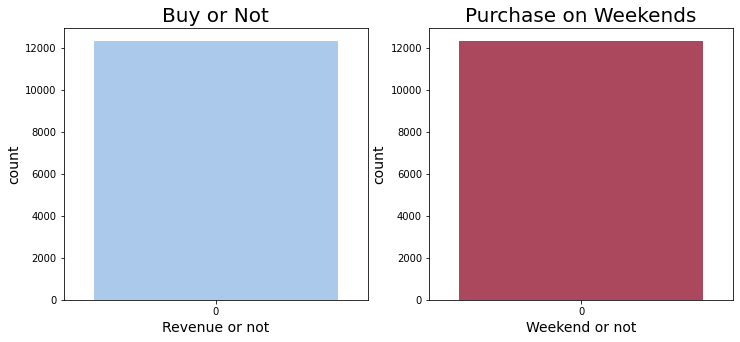

In [4]:
# Chart Perbandingan jumlah yang membeli atau tidak
# Chart Perbandingan yang membeli di Weekend atau tidak

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1 ,2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

## Data Pre-processing

Pilihlah proses dalam Pre-processing yang hanya diperlukan sesuai dengan tujuan modeling
1. Check Missing Value
2. Handling Missing Value (Lebih jelas pada modul khusus sebelumnya)

In [6]:
# Check Missing value dengan chaining method sum()

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


In [7]:
# Handling Missing Value using median

import pandas as pd
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

C:\Users\sendy\AppData\Local\Temp\ipykernel_16436\155507253.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset1.fillna(dataset1.median(), inplace = True)


3. Data Preprocessing: Scaling
- digunakan untuk mengatasi rentang nilai dari setiap feature yang cukup bervariasi

In [8]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


C:\Users\sendy\AppData\Local\Temp\ipykernel_16436\1040740683.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


4. Data Pre-processing: Konversi string ke numerik
- Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris


In [9]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


C:\Users\sendy\AppData\Local\Temp\ipykernel_16436\363161620.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Pemodelan dengan Scikit-Learn

Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target.

1. Memisahkan Feature dan Label
2. Training dan Test Dataset
3. Training Model: Fit
4. Training Model: Predict
5. Evaluasi Model Performance 


In [13]:
# Memisahkan Feature dan Label
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])

# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Training dan Test Dataset
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

# Training Model: Fit
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

# Training Model: Predict
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)
Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)
(2466,)


C:\Users\sendy\AppData\Local\Temp\ipykernel_16436\1544923610.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Evaluasi Model Performance: 
- Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda
- Accuracy : Metrik paling sederhana untuk mengecek performansi model adalah
- Confusion Matrix : merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML.
    - True Positive (TP), True Negative (TN), False Positive (FP), False Negatif (FN)

In [14]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

C:\Users\sendy\AppData\Local\Temp\ipykernel_16436\349762213.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Training Accuracy : 1.0
Testing Accuracy : 0.8580697485806975

Confusion matrix:
[[1888  156]
 [ 194  228]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.59      0.54      0.57       422

    accuracy                           0.86      2466
   macro avg       0.75      0.73      0.74      2466
weighted avg       0.85      0.86      0.86      2466



##### Pakai Metrik yang Mana?
- Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.
- Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.
- Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision. Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya tidak SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).